In [3]:
!pip install yfinance matplotlib seaborn pandas


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download stock data (Example: NIFTY 50 index)
ticker = "^NSEI"  # You can also try "RELIANCE.NS", "TCS.NS", etc.
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
data = data[['Close']]
data.dropna(inplace=True)

# Preview data
print(data.head())


C:\Users\Rohit Shere\AppData\Local\Temp\ipykernel_18916\1709812735.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price              Close
Ticker             ^NSEI
Date                    
2020-01-01  12182.500000
2020-01-02  12282.200195
2020-01-03  12226.650391
2020-01-06  11993.049805
2020-01-07  12052.950195


In [5]:
# Step 2: Calculate rolling statistics (20-day window)
data['Rolling Mean'] = data['Close'].rolling(window=20).mean()
data['Rolling Std'] = data['Close'].rolling(window=20).std()
data['Volatility'] = data['Rolling Std'] / data['Rolling Mean']

# Detect High Volatility Periods
data['High Volatility'] = data['Volatility'] > data['Volatility'].quantile(0.75)

print(data.tail())


Price              Close  Rolling Mean Rolling Std Volatility High Volatility
Ticker             ^NSEI                                                     
Date                                                                         
2024-12-23  23753.449219  24339.255078  339.650109   0.013955           False
2024-12-24  23727.650391  24315.912598  365.202940   0.015019           False
2024-12-26  23750.199219  24289.677539  386.528042   0.015913           False
2024-12-27  23813.400391  24284.640039  392.293283   0.016154           False
2024-12-30  23644.900391  24260.330078  416.619165   0.017173           False


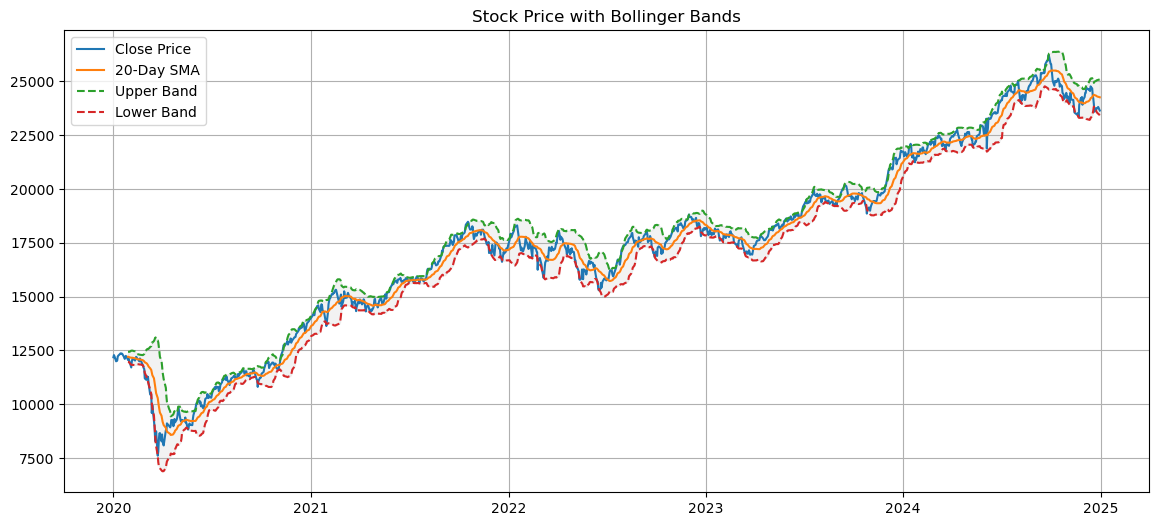

In [6]:
# Bollinger Bands
data['Upper Band'] = data['Rolling Mean'] + (data['Rolling Std'] * 2)
data['Lower Band'] = data['Rolling Mean'] - (data['Rolling Std'] * 2)

# Plot
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Rolling Mean'], label='20-Day SMA')
plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.1)
plt.title('Stock Price with Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()


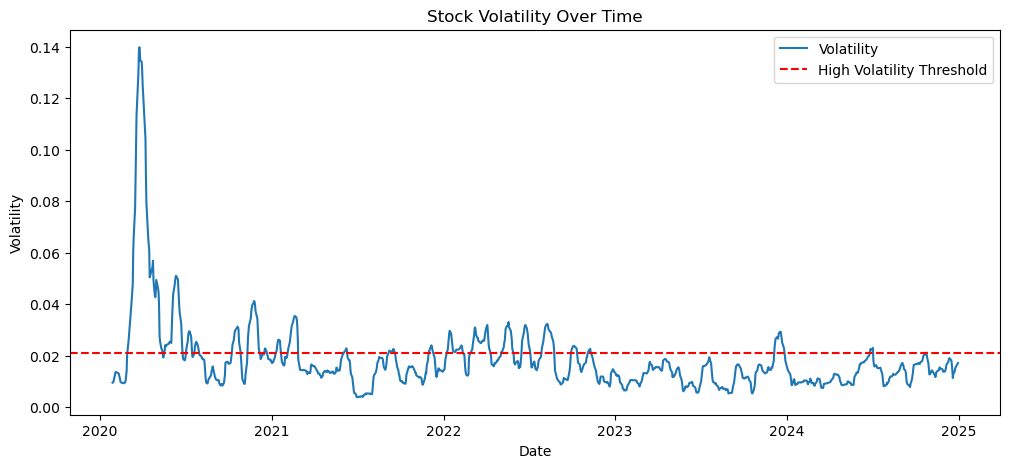

In [7]:
# Plot volatility spikes
plt.figure(figsize=(12,5))
sns.lineplot(data=data['Volatility'], label='Volatility')
plt.axhline(data['Volatility'].quantile(0.75), color='red', linestyle='--', label='High Volatility Threshold')
plt.title('Stock Volatility Over Time')
plt.legend()
plt.show()
